# Regresión Líneal

## Imports Necesarios

In [60]:
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## Visualizar Archivo Leído

In [61]:
#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_iter2.csv", index_col=0)

# Ver los 1ros registros
data.head()

,ws,wd,anno,mes,wp1
4,2.93,120.13,2009,7,0.035
5,2.96,115.79,2009,7,0.005
6,2.81,106.71,2009,7,0.251
7,2.73,95.39,2009,7,0.251
8,2.87,88.50,2009,7,0.010


## Separar Datos de Entrenamiento (Train) y Test

In [62]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#filtered_data = data

#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, random_state=200)


dataset_train = data_train.values
x_train = dataset_train[:,0:2]
y_train = dataset_train[:,4]


dataset_test = data_test.values
x_test = dataset_test[:,0:2]
y_test = dataset_test[:,4]


#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
 
#X_train = np.array(dataX2)
#y_train = data_train['wp1'].values

In [63]:
x_train

array([[  5.67,  23.84],
       [  5.12, 359.73],
       [  4.26,  52.45],
       ...,
       [  7.05,  86.91],
       [  3.17, 321.67],
       [  2.48, 301.36]])

In [64]:
y_train

array([0.441, 0.216, 0.01 , ..., 0.252, 0.045, 0.115])

## Crear Modelo, Entrenarlo y Predeccir

In [65]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(x_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
#y_pred = regr.predict(dataX2)
y_pred_train = regr.predict(x_train)
y_pred_test = regr.predict(x_test)

## Obtener Metricas del Modelo

In [67]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0)
#print('Independent term: \n', regr.intercept_)

# Error Cuadrado Medio
#print("Mean squared error Train: %.2f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_pred_test))

# Puntaje de Varianza. El mejor puntaje es un 1.0
#print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
mean_absolute_error
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_train, y_pred_train))
print('mean_absolute_error: %.2f' % mean_absolute_error(y_train, y_pred_train))

Coefficients: 
 [ 0.05267429 -0.00014323]
Mean squared error Test: 0.03
Coefficient of determination Test (R^2): 0.26
mean_absolute_error: 0.13


## Graficar Resultados

In [58]:
# Determinar rango de datos para graafica
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]
corr = np.corrcoef(y_test, y_pred_test)

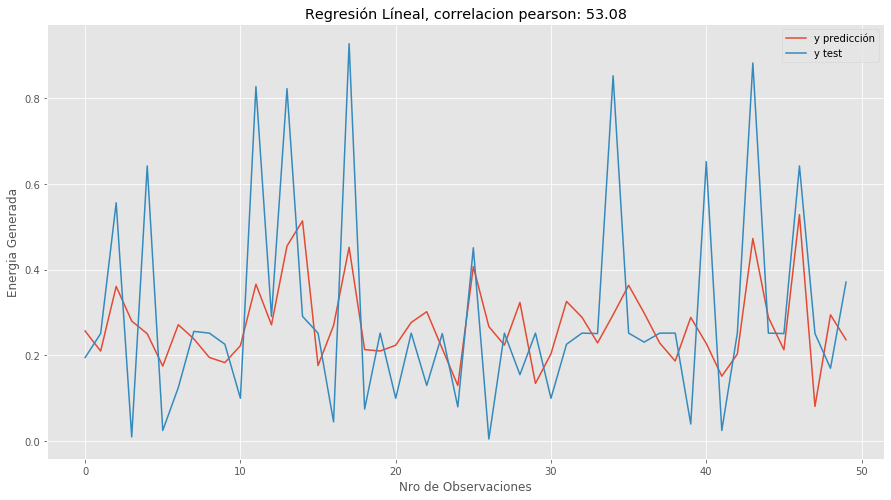

In [59]:
plt.plot(pred_test_plot, label ="y predicción")
plt.plot(y_test_plot, label ="y test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Regresión Líneal, correlacion pearson: %.2f" % (corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Nro de Observaciones")
plt.legend()
plt.show()

## Guarda Datos de Predicción

In [41]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_iter1_reglin.csv')